In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
plt.style.use('science')
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import pandas as pd

In [ ]:
low_f_results = np.loadtxt('../Result_files/low_f/final_best_positions.txt')
high_f_results = np.loadtxt('../Result_files/high_f/final_best_positions.txt')

In [3]:
search_results = []


In [4]:
search_results.extend(list(high_f_results[high_f_results[:,-1]>90]))

In [5]:
search_results.extend(list(low_f_results[low_f_results[:,-1]>90]))

In [6]:
search_results = np.array(search_results)

In [7]:
high_f_results[high_f_results[:,-1]>90]

array([[ 3.91494038e+01,  1.00052173e+00, -6.40913397e-01,
         7.27735580e-06,  1.13111247e-02,  3.27825444e+00,
        -1.23754141e+00,  1.58578944e+00,  4.94797615e+02],
       [ 2.74217729e+01,  3.29526072e+00,  4.76407046e-01,
         4.00839293e-04,  1.22427271e-02,  3.50651463e+00,
         1.05125580e-01,  1.55687599e+00,  1.51838225e+02],
       [ 2.60907014e+01,  7.17696095e+00, -4.70848073e-01,
         2.46814733e-05,  2.37677896e-02,  8.09469258e-01,
        -6.73925164e-01,  7.48418535e-01,  4.05453715e+02],
       [ 2.24111399e+01,  3.64825175e+00,  3.44875260e-02,
         3.64292581e-05,  2.76543486e-02,  1.69658166e+00,
         1.52459253e-01,  1.64933495e+00,  4.09177480e+02]])

In [8]:
delta_mc = []
delta_lambda = []
delta_beta = []
delta_f_low = []

OVERWRITE SEARCH WITH REPEATED SEARCH IN THIS TILE

SOURCE: /rds/projects/m/moorecj-db-gwanalysis/TF_search/full_search/high_frequencies/tile_238

In [9]:
# BODGED OVERWRITE WITH REPEATED SEARCH
search_results[2] = np.array([ 2.60907014e+01 ,7.17696095e+00, -4.70848073e-01,  2.46814733e-05,
  2.37677896e-02,  8.09469258e-01, -6.73925164e-01,  7.48418535e-01,405.45371475844576])

In [10]:
catalog = pd.read_csv('catalog.csv')

In [11]:
catalog

,Name,EclipticLatitude,EclipticLongitude,Mass1,Mass2,Spin1,Spin2,Inclination,InitialFrequency,InitialPhase,Polarization,Redshift,Distance,ObservationDuration,Cadence
0,b'sobhb1',0.951881,5.683863,35.432815,32.089232,0.763621,0.206713,2.979326,0.005858,3.394436,3.176550,0.034875,159.904954,6.311630e+07,5
1,b'sobhb5',0.078151,3.504416,34.499636,28.802451,-0.681947,-0.385757,0.738223,0.012243,1.996578,1.861111,0.036661,168.310236,6.311630e+07,5
2,b'sobhb8',0.104561,1.691095,33.712362,19.926473,-0.022495,0.032351,1.526063,0.027654,2.186094,1.624495,0.007569,34.013334,6.311630e+07,5
3,b'sobhb9',-0.654182,0.802623,30.724619,29.227329,0.123650,0.078372,2.075090,0.023768,1.341579,5.384847,0.018876,85.540696,6.311630e+07,5
4,b'sobhb10',-1.235802,3.288491,48.087722,42.093315,-0.110226,0.194370,2.685023,0.011311,3.138914,1.999555,0.036789,168.911407,6.311630e+07,5


In [12]:

for index,sobbh in catalog.iterrows():
    print(sobbh)
    print(sobbh['Name'])

    m1 = sobbh['Mass1']
    m2 = sobbh['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat = sobbh['EclipticLatitude']
    ecliptic_long = sobbh['EclipticLongitude']
    f_low = sobbh['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    max_upsilon = search_results[index,-1]
    
    print('Delta mc:',np.abs(search_results[index][0]-mc),np.abs(search_results[index][0]-mc)/mc)
    print('Delta lambda: ',np.abs(search_results[index][5]-ecliptic_long),np.abs(search_results[index][5]-ecliptic_long)/ecliptic_long)
    print('Delta beta: ',np.abs(search_results[index][6]-ecliptic_lat),np.abs(search_results[index][6]-ecliptic_lat)/np.abs(ecliptic_lat))
    print('Delta f_low: ',np.abs(search_results[index][4]-f_low),np.abs(search_results[index][4]-f_low)/f_low)
    print('Max upsilon: ',max_upsilon)

    delta_mc.append(np.abs(search_results[index][0]-mc)/mc)
    delta_lambda.append(np.abs(search_results[index][5]-ecliptic_long)/ecliptic_long)
    delta_beta.append(np.abs(search_results[index][6]-ecliptic_lat)/np.abs(ecliptic_lat))
    delta_f_low.append(np.abs(search_results[index][4]-f_low)/f_low)
    
    
    print('\n')

        

Name                         b'sobhb1'
EclipticLatitude              0.951881
EclipticLongitude             5.683863
Mass1                        35.432815
Mass2                        32.089232
Spin1                         0.763621
Spin2                         0.206713
Inclination                   2.979326
InitialFrequency              0.005858
InitialPhase                  3.394436
Polarization                   3.17655
Redshift                      0.034875
Distance                    159.904954
ObservationDuration    63116299.527091
Cadence                              5
Name: 0, dtype: object
b'sobhb1'
Delta mc: 8.34036492065593e-05 2.8419418447196595e-06
Delta lambda:  0.0006965587954317343 0.00012255025418589146
Delta beta:  0.012896062645322393 0.013547973592495207
Delta f_low:  3.44319192949194e-10 5.877452542522639e-08
Max upsilon:  152.68924453058963


Name                         b'sobhb5'
EclipticLatitude              0.078151
EclipticLongitude             3.504416
Mass

In [13]:
catalog['Name'] = np.array([['Source 1'],
                            ['Source 5'],
                            ['Source 8'],
                            ['Source 9'],
                            ['Source 10']])

In [14]:
catalog

,Name,EclipticLatitude,EclipticLongitude,Mass1,Mass2,Spin1,Spin2,Inclination,InitialFrequency,InitialPhase,Polarization,Redshift,Distance,ObservationDuration,Cadence
0,Source 1,0.951881,5.683863,35.432815,32.089232,0.763621,0.206713,2.979326,0.005858,3.394436,3.176550,0.034875,159.904954,6.311630e+07,5
1,Source 5,0.078151,3.504416,34.499636,28.802451,-0.681947,-0.385757,0.738223,0.012243,1.996578,1.861111,0.036661,168.310236,6.311630e+07,5
2,Source 8,0.104561,1.691095,33.712362,19.926473,-0.022495,0.032351,1.526063,0.027654,2.186094,1.624495,0.007569,34.013334,6.311630e+07,5
3,Source 9,-0.654182,0.802623,30.724619,29.227329,0.123650,0.078372,2.075090,0.023768,1.341579,5.384847,0.018876,85.540696,6.311630e+07,5
4,Source 10,-1.235802,3.288491,48.087722,42.093315,-0.110226,0.194370,2.685023,0.011311,3.138914,1.999555,0.036789,168.911407,6.311630e+07,5


In [15]:
matplotlib.rcParams.update({'font.size': 28})


Source 1
4


Source 5
1


Source 8
3


Source 9
2


Source 10
0




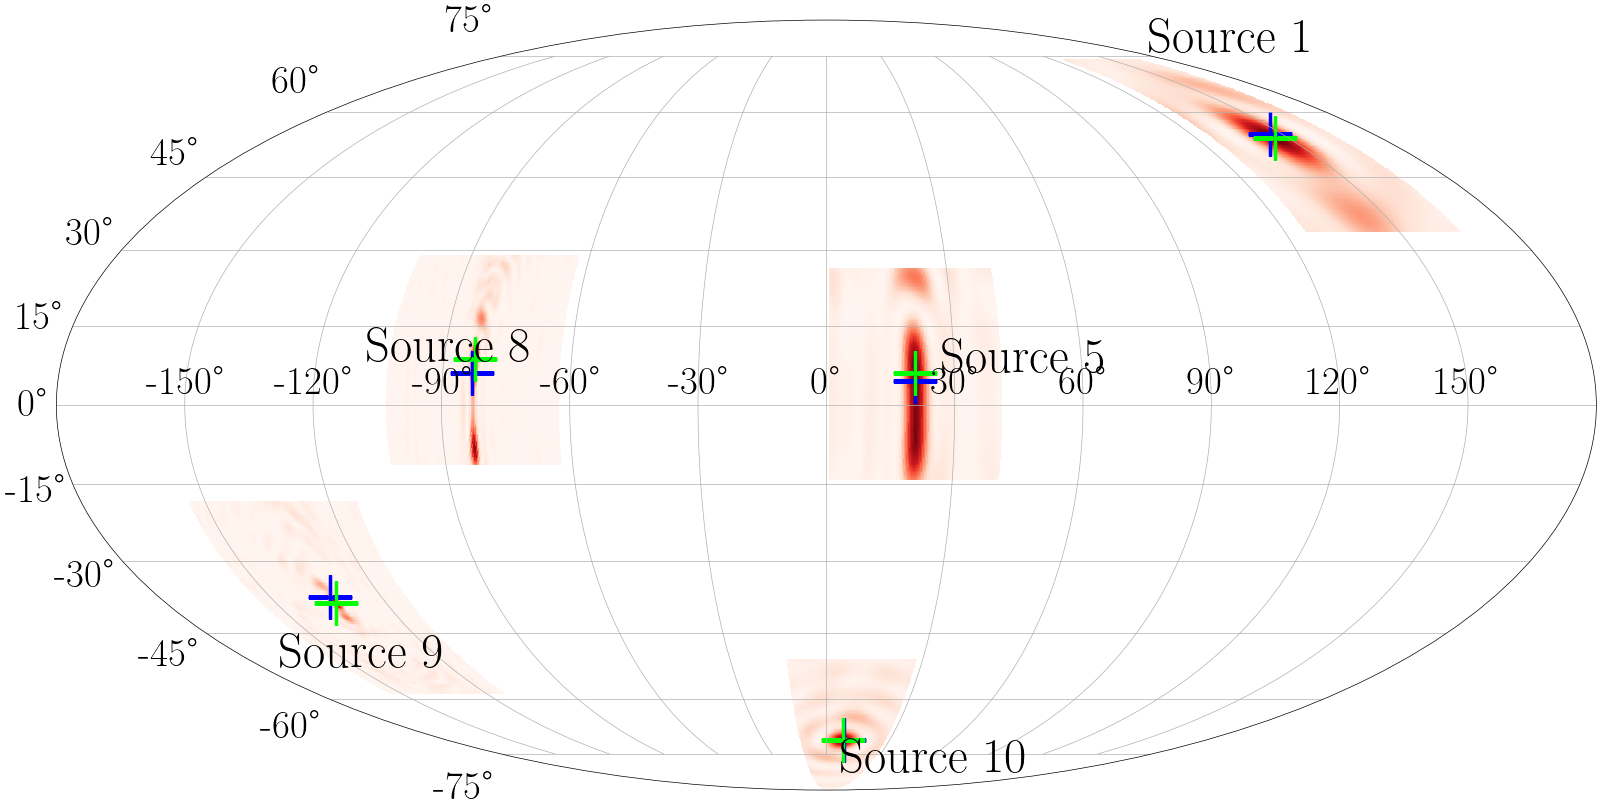

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(projection="mollweide")
plt.grid(True)



for index,sobbh in catalog.iterrows():
    print(sobbh['Name'])

    m1 = sobbh['Mass1']
    m2 = sobbh['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat_injected = sobbh['EclipticLatitude']
    ecliptic_long_injected = sobbh['EclipticLongitude']
    # f_low = sobbh['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    print(index)
    
    max_upsilon = search_results[index,-1]

    # parameters (FROM SEARCH)

    mc_search_result = search_results[index][0]
    q_search_result = search_results[index][1]
    cosinc_search_result = search_results[index][2]
    e0_search_result = search_results[index][3]
    f0_search_result = search_results[index][4]
    lambda_search_result = search_results[index][5]
    beta_search_result = search_results[index][6]
    psi_search_result = search_results[index][7]

    # Load in precomputed skymap datafile
    # Format is X,Y,statistics
    datafile = np.load(str(sobbh['Name'])+'_skymap.npy')

    X = datafile[0]
    Y = datafile[1]
    statistics = datafile[2]

    # Make a grid of (lambda,beta) around the found source
    sqrt_N = 120 #NOTE: RESOLTION OF SKYMAP HAS TO MATCH WHAT WAS USED TO CREATE THE DATAFILE ABOVE


    lambdas_unravelled = X.flatten()
    betas_unravelled = Y.flatten()

    plt.pcolormesh(X-np.pi,Y,statistics,cmap='Reds')
    # plt.colorbar()
    plt.scatter(ecliptic_long_injected-np.pi,ecliptic_lat_injected,marker='+',s=1000,color='b',linewidths=2.5)
    plt.scatter(lambda_search_result-np.pi,beta_search_result,marker='+',s=1000,color='lime',linewidths=2.5)

    plt.text((ecliptic_long_injected-np.pi)*1.3,ecliptic_lat_injected*1.4,sobbh['Name'],fontsize=35)
    # plt.xlabel('Ecliptic longitude [rads]')
    # plt.ylabel('Ecliptic latitude [rads]')
    # plt.show()
    
    print('\n')




plt.savefig('Skymap.pdf')
plt.show()
